<a href="https://colab.research.google.com/github/BrianBehnke/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

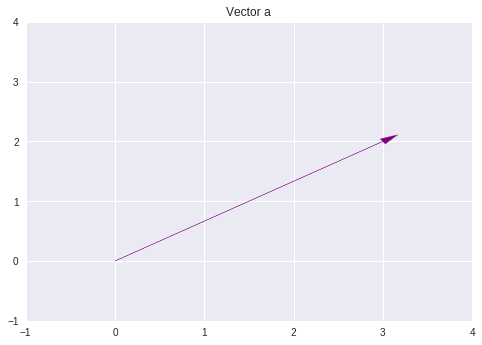

In [78]:
import math
import matplotlib.pyplot as plt
import numpy as np

vector = [3, 2]

plt.arrow(0,0, vector[0], vector[1], head_width=.1, head_length=0.2, color ='purple')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Vector a")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [7]:
b = np.array([17, -4, -2, 1])
blength = np.linalg.norm(b)

print(blength)

17.60681686165901


The **norm** of a vector represents the length of the vector. 

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [68]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])
cdotd = c * d
print(cdotd)

[ 27 -49  -8  72]


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [70]:
from numpy import linalg

e = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])
inve = np.linalg.inv(e)
print('Inverse E')
print(inve)
print ('\n')
print('Transposed E')
transe = np.transpose(e)
print(transe)

Inverse E
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


Transposed E
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [17]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [81]:
print("Customers")
print('Mean: ', np.mean(customers))
print('Variance: ', np.var(customers))
print('Standard Deviation: ',np.std(customers))
print ('\n')

print("Snow")
print('Mean: ', np.mean(snow))
print('Variance: ', np.var(snow))
print('Standard Deviation: ',np.std(snow))


Customers
Mean:  1135.7142857142858
Variance:  84653.06122448981
Standard Deviation:  290.95199127087926


Snow
Mean:  2.7142857142857144
Variance:  7.346938775510203
Standard Deviation:  2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The varience of customers and snow are not comparible as their domains are vastly different. Customers domain has a range of 840 while the snow domain has a range of 7. Naturally the spread of data over a large range will be greater while a spread over a small range will be quite small. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [82]:
print('Varience-Covarience Matrix for Customers and Snow')
print(np.corrcoef(customers, snow))

Varience-Covarience Matrix for Customers and Snow
[[1.         0.72846346]
 [0.72846346 1.        ]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [24]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [25]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [26]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [35]:
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [83]:
from sklearn.preprocessing import StandardScaler
features = ['Alcoholic Drinks', 'Beverages', 'Carcass_Meat', 'Cereals', 
            'Cheese', 'Confectionery', 'Fats_and_Oils', 'Fish', 'Fresh_Fruit',	
            'Fresh_Potatoes', 'Fresh_Veg', 'Other_Meat', 'Other_Veg', 
            'Processed_Potatoes', 'Processed_Veg', 'Soft_Drinks', 'Sugars']
# Just features
x = df.loc[:, features].values
# Just the target
y = df.loc[:,['Country']].values
# Transform and standardize the features
x = StandardScaler().fit_transform(x)

print(x[0:5])


[[ 0.10499766 -0.05191741 -0.01749546 -0.64432226  0.65827466 -0.13830319
  -0.63242919  0.64458535  0.73740709 -0.45007561  0.86331183 -0.25954622
   0.37773603 -0.33626508  0.80547723 -0.43523112  0.13055067]
 [ 0.84182336  1.60943981 -1.27716878  1.67946294  0.53580495  0.96812236
   1.53589947  1.15244047  0.9292974   0.43569619  1.09352832  1.19885635
   1.40168163  0.08406627  1.17160324 -1.40423624  1.54795798]
 [ 0.71656299 -0.46725672 -0.22744102 -0.85557546  0.53580495  0.74683725
  -1.09707105 -0.33205912 -0.0575671  -1.33584741 -0.70983418  0.54381113
  -0.49636387  1.51319287 -0.87870243  1.19072664 -0.54085279]
 [-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
   0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
  -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
              columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [85]:
finalDf = pd.concat([principalDf, df[['Country']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


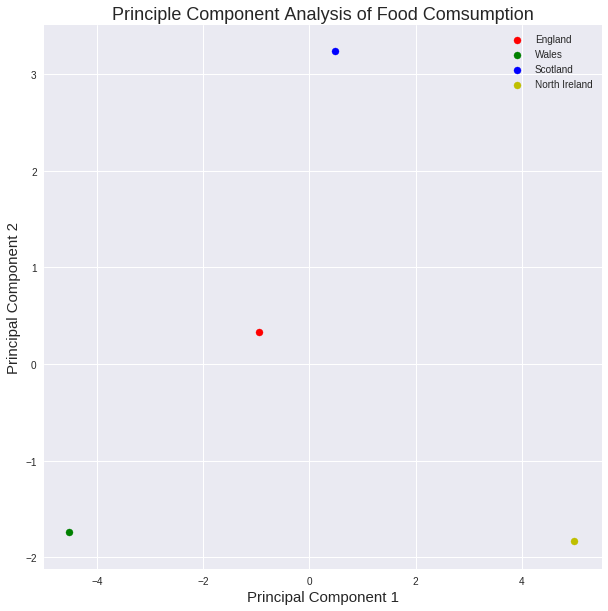

In [93]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principle Component Analysis of Food Comsumption', fontsize = 18)
targets = ['England', 'Wales', 'Scotland', 'North Ireland']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Country'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets);


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [48]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [49]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

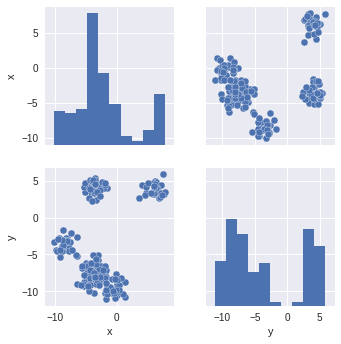

In [51]:
#points.head()

import seaborn as sns
sns.pairplot(points);

In [53]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
names = points.columns
print(names)

Index(['x', 'y'], dtype='object')


In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(points)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

print(pd.DataFrame(pca.components_,columns=points.columns,index = ['PC-1','PC-2']))

             x         y
PC-1  0.506727  0.862107
PC-2  0.862107 -0.506727


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalDf)
principalDf_kmeans = kmeans.predict(principalDf)

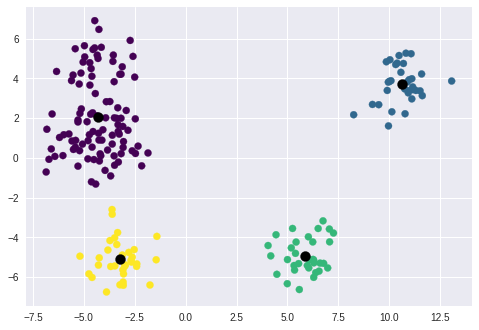

In [57]:

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf_kmeans, s=50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100);

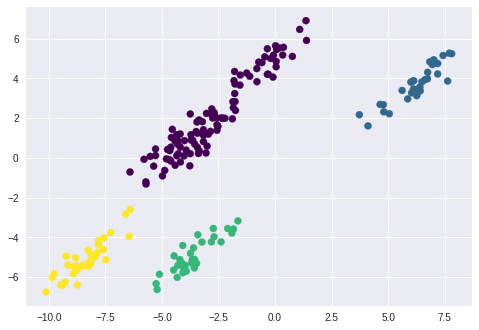

In [60]:

plt.scatter(points['x'], principalDf['principal component 2'], c=principalDf_kmeans, s=50, cmap = 'viridis');

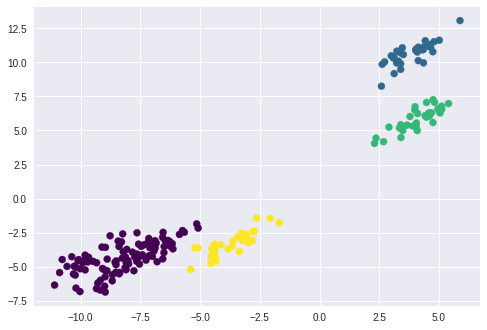

In [61]:
plt.scatter(points['y'], principalDf['principal component 1'], c=principalDf_kmeans, s=50, cmap = 'viridis');